# Домашнее задание к лекции «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

In [9]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt

In [11]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [33]:
sigma = 25  # корень из дисперсии
Z = 1.96  # 95%   # Квантиль нормального распределения. 
Delta = 3 #%         #Погрешность

N = ((sigma*Z)/Delta)**2
print(round(N, 0))

267.0


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [32]:
from math import sqrt

n = 25
mean = 130
std = 12

Z = scipy.stats.t.ppf((1 + 0.98)/2, n)
se = std / sqrt(n)
h = Z * se

print('Нижняя граница: ', mean - h)
print('Среднее: ', mean)
print('Верхняя граница: ', mean + h)

Нижняя граница:  124.03574277901446
Среднее:  130
Верхняя граница:  135.96425722098553


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [22]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [23]:
stats.ttest_ind(population_men, population_women, equal_var=False)

Ttest_indResult(statistic=2.073546911730484, pvalue=0.038142644821268584)

p-value больше 0.001, различие между выборками незначительно

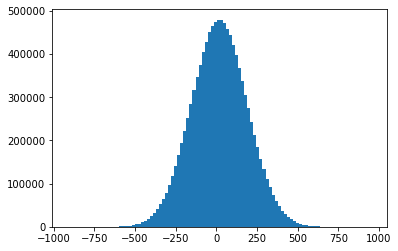

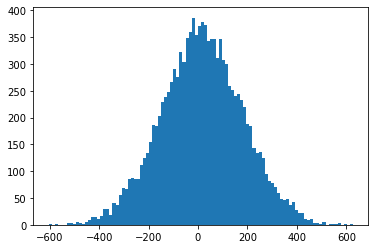

In [28]:
plt.hist(population_men, bins=100);
plt.show()
plt.hist(population_women, bins=100);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [21]:
sigma = 150  # корень из дисперсии
Z = 1.96  # 95%   # Квантиль нормального распределения. 
Delta = 50 #%         #Погрешность

N = ((sigma*Z)/Delta)**2
print('Средний чек: ', round(N, 2))

Средний чек:  34.57


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [18]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [31]:
oddsratio, pvalue = stats.fisher_exact(observations)
print(oddsratio, pvalue)

0.5811965811965812 0.35417955365927367


p-value меньше 0.5, различие статистически значимо. Вероятно, маг действительно умеет предсказывать погоду

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [17]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [8]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

<b>Через доверительные интервалы</b>

In [12]:
print(mean_confidence_interval(data_2, 0.95))

(3.601578660531681, 3.967741935483871, 4.333905210436061)


In [13]:
statistics.mean(data_1)

6.628571428571429

Доверительный интервал второй выборки не содержит среднее первой выборки. 

<b>Через t-test</b>

In [15]:
stats.ttest_ind(data_1, data_2, equal_var=False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

p-value очень маленький

<b>Вывод: Эти выборки c большой вероятностью не принадлежат к одному множеству</b>

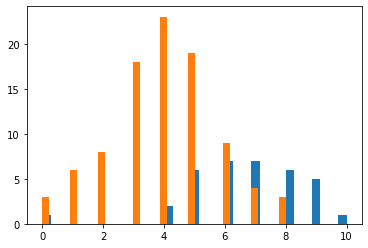

In [16]:
plt.hist(data_1, bins=35);
plt.hist(data_2, bins=35);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:
Если задание без подвоха, то p-value = 0.03, интерпретация зависит от уровня значимости. Если он стандартный 0.05, то p-value меньше уровня значимости => отклоняем нулевую гипотезу - распределение ненормальное.

Если я правильно поняла этот момент, то даже если распределение ненормальное, то средние выборок из этой ГС будет распределяться нормально вокруг среднего, равного среднему по этой ГС. То есть мы можем проверять статистические гипотезы в таком случае

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

Так как это две разные выборки, используем двухвыборочный t-test

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

- p-value больше уровня значимости - различия статистически не значимы.
- Различия будут значимы при p-value 0.06

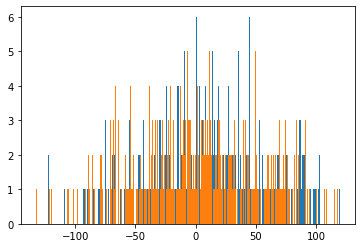

In [6]:
plt.hist(A, bins=300);
plt.hist(B, bins=300);